In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/santiagobermejo/Desktop/IRONHACK/Kaggle-competition/input/diamonds_train.csv')
df = df.set_index('id')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


El volumen de un diamante es igual a la masa entre la densidad, con esto podriamos susituir las columnas X,Y y Z por V

In [3]:
df['vol']=df['carat'].apply(lambda x: x*3,52)

In [4]:
df = df[['cut', 'color', 'depth', 'clarity', 'table', 'price', 'vol']]
df.head()

,cut,color,depth,clarity,table,price,vol
id,,,,,,,
0,Premium,F,61.5,VS1,58.0,3446,2.34
1,Ideal,D,60.8,SI1,56.0,732,0.93
2,Ideal,F,62.3,SI1,54.0,475,0.90
3,Ideal,E,62.0,VVS2,58.0,9552,3.12
4,Ideal,J,61.4,SI1,55.0,1276,1.95


In [5]:
y = df.price

In [6]:
X = df.drop(['price'], axis=1)

,depth,table,vol
depth,1.000000,-0.299534,0.023118
table,-0.299534,1.000000,0.181725
vol,0.023118,0.181725,1.000000


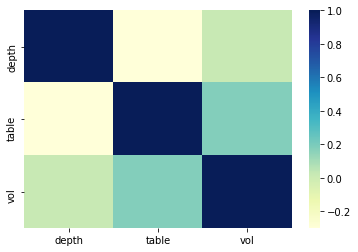

In [7]:
corr = X.corr()
display(X.corr())
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [8]:
print(X.isnull().sum())

cut        0
color      0
depth      0
clarity    0
table      0
vol        0
dtype: int64


In [9]:
X = pd.get_dummies(X)

In [10]:
display(X.corr())

,depth,table,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
depth,1.000000,-0.299534,0.023118,0.265109,0.135879,-0.023879,-0.195329,0.030944,-0.011754,-0.028128,...,0.019234,0.020890,0.065013,-0.030022,0.043750,0.008516,-0.023550,-0.011355,-0.021304,-0.018944
table,-0.299534,1.000000,0.181725,0.129130,0.170885,-0.548758,0.340812,0.118267,-0.012161,0.010219,...,0.017702,0.040949,0.048670,-0.080232,0.049677,0.097016,-0.024947,-0.012874,-0.066543,-0.061016
vol,0.023118,0.181725,1.000000,0.088224,0.033836,-0.162420,0.116382,0.009913,-0.110766,-0.137556,...,0.161089,0.181693,0.119688,-0.118367,0.060243,0.267485,-0.059075,-0.037689,-0.165811,-0.137703
cut_Fair,0.265109,0.129130,0.088224,1.000000,-0.055109,-0.143102,-0.102623,-0.094356,-0.012626,-0.017144,...,0.000979,0.020702,0.152248,-0.027841,0.003311,0.056544,-0.017712,-0.025757,-0.038589,-0.029500
cut_Good,0.135879,0.170885,0.033836,-0.055109,1.000000,-0.256814,-0.184168,-0.169333,0.006140,0.006241,...,0.003885,0.015586,0.018129,-0.031768,0.057561,0.044308,-0.020143,-0.023100,-0.036301,-0.039702
cut_Ideal,-0.023879,-0.548758,-0.162420,-0.143102,-0.256814,1.000000,-0.478232,-0.439708,0.017825,-0.004647,...,-0.006854,-0.036268,-0.049446,0.104420,-0.082219,-0.108818,0.034018,0.018320,0.085812,0.073643
cut_Premium,-0.195329,0.340812,0.116382,-0.102623,-0.184168,-0.478232,1.000000,-0.315327,-0.023251,-0.013468,...,0.006119,0.017617,0.012007,-0.054713,0.018925,0.063161,-0.008371,0.026287,-0.051573,-0.062835
cut_Very Good,0.030944,0.118267,0.009913,-0.094356,-0.169333,-0.439708,-0.315327,1.000000,0.004302,0.022227,...,-0.001411,0.005045,-0.028950,-0.032277,0.035915,0.008325,-0.010157,-0.022635,-0.006232,0.018444
color_D,-0.011754,-0.012161,-0.110766,-0.012626,0.006140,0.017825,-0.023251,0.004302,1.000000,-0.178551,...,-0.127749,-0.088404,-0.022836,-0.049396,0.058131,0.031506,-0.049643,0.023679,-0.047088,-0.018493
color_E,-0.028128,0.010219,-0.137556,-0.017144,0.006241,-0.004647,-0.013468,0.022227,-0.178551,1.000000,...,-0.157845,-0.109231,-0.011219,-0.043325,0.006028,0.011434,-0.027358,0.023474,-0.002015,0.009249


In [11]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr,columns=X.columns)
Xpr.head()

,depth,table,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.043196,0.060863,-0.009216,-0.043277,-0.077665,-0.201674,0.421706,-0.132975,-0.093880,-0.115997,...,-0.082993,-0.057432,-0.029326,-0.046074,-0.139036,-0.112016,0.585594,-0.133883,-0.066636,-0.080086
1,-0.165213,-0.161134,-0.255378,-0.043522,-0.078106,0.304135,-0.145447,-0.133731,0.653347,-0.116656,...,-0.083464,-0.057758,-0.029493,-0.046335,0.441151,-0.112652,-0.104741,-0.134643,-0.067015,-0.080541
2,0.097615,-0.391044,-0.265757,-0.044381,-0.079647,0.310136,-0.148317,-0.136369,-0.096276,-0.118957,...,-0.085111,-0.058898,-0.030075,-0.047250,0.449856,-0.114875,-0.106808,-0.137300,-0.068337,-0.082130
3,0.040488,0.056921,0.117990,-0.040474,-0.072635,0.282830,-0.135258,-0.124363,-0.087799,0.491732,...,-0.077618,-0.053712,-0.027427,-0.043089,-0.130031,-0.104761,-0.097404,-0.125211,-0.062320,0.712229
4,-0.046872,-0.209799,-0.059588,-0.033532,-0.060177,0.234322,-0.112060,-0.103033,-0.072741,-0.089878,...,-0.064306,0.822824,-0.022723,-0.035699,0.339886,-0.086793,-0.080698,-0.103737,-0.051632,-0.062053


In [12]:
from sklearn.model_selection import train_test_split

Xpr_train, Xpr_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.2)

In [13]:
print(Xpr_train.shape)
print(Xpr_test.shape)
print(y_train.shape)
print(y_test.shape)

(32276, 23)
(8069, 23)
(32276,)
(8069,)


In [31]:
model = RandomForestRegressor(n_estimators=800, max_depth=20, min_samples_leaf=3, random_state=111, n_jobs = -1)
model.fit(Xpr_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=-1, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)

In [32]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, model.predict(Xpr_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, model.predict(Xpr_test))))
print('MSLE', mean_squared_log_error(y_test, model.predict(Xpr_test)))
print('MAE', mean_absolute_error(y_test, model.predict(Xpr_test)))
print('R2', r2_score(y_test, model.predict(Xpr_test)))

METRIC SUMMARY
MSE 367089.96145180264
RMSE 605.8794941667878
MSLE 0.012289822586716395
MAE 305.22870051326635
R2 0.9775500070955889


In [33]:
predictions=model.predict(Xpr)

In [34]:
predictions.shape

(40345,)

TEST

In [35]:
X1 = pd.read_csv('/Users/santiagobermejo/Desktop/IRONHACK/Kaggle-competition/input/diamonds_test.csv')
X1 = X1.set_index('id')
X1.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [36]:
X1['vol']=X1['carat'].apply(lambda x: x*3,52)

In [37]:
X1 = X1[['cut', 'color','depth' ,'clarity', 'table', 'vol']]
X1.head()

,cut,color,depth,clarity,table,vol
id,,,,,,
0,Premium,H,62.2,SI2,58.0,3.30
1,Ideal,I,62.5,SI1,57.0,1.53
2,Premium,G,61.9,SI1,59.0,6.09
3,Premium,F,60.0,SI1,60.0,3.63
4,Ideal,F,61.8,SI1,55.0,1.65


In [38]:
X1.shape

(13449, 6)

In [39]:
X1 = pd.get_dummies(X1)

In [40]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr1 = tr.fit_transform(X1)
Xpr1 = pd.DataFrame(Xpr1,columns=X1.columns)

In [41]:
Xpr1.head()

,depth,table,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.077110,0.056026,0.155570,-0.042230,-0.077952,-0.196963,0.413160,-0.129940,-0.091010,-0.115398,...,-0.079748,-0.058169,-0.028159,-0.043904,-0.138863,0.538611,-0.103232,-0.131722,-0.065277,-0.076476
1,0.126846,-0.052216,-0.147334,-0.041932,-0.077402,0.296341,-0.141273,-0.129023,-0.090368,-0.114583,...,0.731907,-0.057758,-0.027960,-0.043594,0.420331,-0.108368,-0.102504,-0.130793,-0.064816,-0.075936
2,0.024422,0.151878,0.585485,-0.038956,-0.071910,-0.181696,0.381135,-0.119868,-0.083956,-0.106453,...,-0.073567,-0.053660,-0.025976,-0.040501,0.390506,-0.100679,-0.095230,-0.121512,-0.060217,-0.070548
3,-0.293875,0.272927,0.211986,-0.042179,-0.077859,-0.196728,0.412667,-0.129785,-0.090902,-0.115260,...,-0.079653,-0.058099,-0.028125,-0.043851,0.422813,-0.109008,-0.103109,-0.131565,-0.065199,-0.076384
4,0.010828,-0.304502,-0.144202,-0.047659,-0.087974,0.336816,-0.160568,-0.146645,-0.102711,-0.130234,...,-0.090001,-0.065647,-0.031779,-0.049548,0.477741,-0.123169,-0.116504,-0.148657,-0.073669,-0.086307


In [42]:
price = model.predict(Xpr1)

In [43]:
Xpr1['price']=price

In [44]:
df_submmit = Xpr1[['price']]

In [45]:
df_submmit.index.name='id'

In [46]:
df_submmit

,price
id,
0,4443.216101
1,1021.239469
2,17017.718822
3,6485.844044
4,1539.628067
...,...
13444,694.833683
13445,2487.960430
13446,495.420631


In [47]:
df_submmit.to_csv("/Users/santiagobermejo/Desktop/IRONHACK/Kaggle-competition/input/RandomForest.csv")